# Decision Tree

## 1. Import Libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

## 2. Data Loading

#### banking

In [3]:
data_bank = pd.read_csv('banking.csv')
data_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [4]:
data_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

#### balance-scale

In [5]:
data_bal = pd.read_csv('balance-scale.csv')
data_bal.head()

,B,1,1.1,1.2,1.3
0,R,1,1,1,2
1,R,1,1,1,3
2,R,1,1,1,4
3,R,1,1,1,5
4,R,1,1,2,1


In [6]:
data_bal.columns = ['Balance', 'Left_Weight', 'Left_Distance', 'Right_Weight', 'Right_Distance']
data_bal.head()

,Balance,Left_Weight,Left_Distance,Right_Weight,Right_Distance
0,R,1,1,1,2
1,R,1,1,1,3
2,R,1,1,1,4
3,R,1,1,1,5
4,R,1,1,2,1


In [7]:
data_bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Balance         624 non-null    object
 1   Left_Weight     624 non-null    int64 
 2   Left_Distance   624 non-null    int64 
 3   Right_Weight    624 non-null    int64 
 4   Right_Distance  624 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


In [8]:
data_bal['Balance'].unique()

array(['R', 'L', 'B'], dtype=object)

## 3. Data Slicing (Train and Test)

In [9]:
X = data_bal.values[:,1:5]
Y = data_bal.values[:,0]

In [10]:
X

array([[1, 1, 1, 2],
       [1, 1, 1, 3],
       [1, 1, 1, 4],
       ...,
       [5, 5, 5, 3],
       [5, 5, 5, 4],
       [5, 5, 5, 5]], dtype=object)

In [11]:
Y

array(['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'B',
       'R', 'R', 'R', 'B', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'B',
       'R', 'R', 'L', 'R', 'R', 'R', 'R', 'B', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'L', 'B',
       'R', 'L', 'B', 'R', 'R', 'R', 'L', 'R', 'R', 'R', 'R', 'B', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'L', 'L', 'B',
       'L', 'L', 'R', 'R', 'R', 'L', 'R', 'R', 'R', 'R', 'L', 'R', 'R',
       'R', 'R', 'B', 'R', 'R', 'R', 'R', 'L', 'B', 'R', 'R', 'R', 'B',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'L', 'B', 'R', 'L', 'B',
       'R', 'R', 'R', 'L', 'R', 'R', 'R', 'R', 'B', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'L', 'L', 'L', 'L', 'L', 'L', 'L

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

## 4. Run The Model

#### Training

In [13]:
clf_entropy = DecisionTreeClassifier(criterion = 'entropy')
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

#### Prediction

In [14]:
y_pred = clf_entropy.predict(X_test)

In [15]:
y_pred

array(['L', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'B', 'R', 'R', 'L', 'R',
       'L', 'L', 'L', 'R', 'R', 'L', 'L', 'L', 'L', 'R', 'L', 'L', 'R',
       'B', 'B', 'L', 'L', 'L', 'L', 'L', 'L', 'R', 'L', 'L', 'L', 'L',
       'L', 'L', 'B', 'B', 'R', 'L', 'L', 'B', 'R', 'L', 'R', 'R', 'B',
       'L', 'R', 'L', 'L', 'L', 'B', 'R', 'L', 'L', 'B', 'L', 'L', 'R',
       'B', 'R', 'L', 'R', 'L', 'R', 'R', 'L', 'L', 'L', 'L', 'R', 'R',
       'R', 'R', 'R', 'B', 'R', 'R', 'L', 'L', 'R', 'L', 'B', 'L', 'L',
       'R', 'R', 'R', 'R', 'R', 'L', 'L', 'B', 'L', 'R', 'L', 'R', 'B',
       'R', 'R', 'R', 'R', 'L', 'R', 'L', 'B', 'R', 'R', 'R', 'L', 'R',
       'L', 'R', 'R', 'R', 'B', 'L', 'R', 'R', 'L', 'L', 'L', 'R', 'R',
       'L', 'L', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'L', 'B', 'L', 'R',
       'L', 'R', 'L', 'R', 'B', 'L', 'R', 'R', 'L', 'L', 'L', 'R', 'L',
       'B', 'L', 'L', 'L', 'R', 'L', 'B', 'L', 'B', 'L', 'R', 'B', 'R',
       'B', 'B', 'R', 'R', 'R', 'L', 'L', 'R', 'R', 'L', 'L', 'L

In [16]:
print('Accuracu Score:', accuracy_score(y_test, y_pred))

Accuracu Score: 0.7712765957446809


In [17]:
clf_entropy.feature_importances_

array([0.25081198, 0.24942478, 0.26926441, 0.23049884])

# Random Forest

## 1. Data Loading

In [18]:
data_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [19]:
data_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

## 2. Data Preprocessing

In [21]:
# One-Hot Encoding for Categorical Data
cat_vars = ['job','marital','education','default','housing','loan', 'contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list = pd.get_dummies(data_bank[var], prefix=var)
    data1 = data_bank.join(cat_list)
    data_bank = data1

In [22]:
data_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,0,0,0,0,1,0,0,0,1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,0,0,1,0,0,0,0,0,1,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,0,0,0,0,1,0,0,0,0,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,0,0,1,0,0,0,0,0,1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,0,0,1,0,0,0,0,0,0,1


In [23]:
# Remove Categorical Data
data_vars = data_bank.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars]

In [25]:
# Define new DataFrame without Categorical Data
data_bank2 = data_bank[to_keep]

In [26]:
data_bank2.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,1,0,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,0,1,0,0,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,1,0,0,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,1,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,1,0,0,0,0,0,0,1


## 3. Data Split (Train and Test)

In [27]:
data_vars2 = data_bank2.columns.values.tolist()

In [28]:
y = ['y']
X = [i for i in data_vars2 if i not in y]

In [29]:
X

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_basic.4y',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_no',
 'default_unknown',
 'default_yes',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_

In [30]:
y

['y']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(data_bank2[X], data_bank2[y], test_size = 0.3)

## 4. Run The Model

#### Train The Model

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rf_clf = RandomForestClassifier()

In [35]:
rf_clf.fit(X_train, y_train)

<ipython-input-35-152d25007fe9>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train, y_train)


RandomForestClassifier()

#### Test The Model

In [36]:
model_scoreRF = rf_clf.score(X_test, y_test)

In [37]:
print('Model Accuracy:', model_scoreRF)

Model Accuracy: 0.9138949583232177


#### Importance Score

<AxesSubplot:>

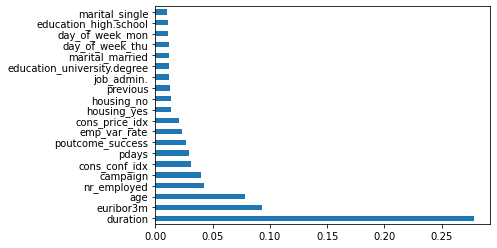

In [40]:
feature_importances = pd.Series(rf_clf.feature_importances_, index = X)
feature_importances.nlargest(20).plot(kind = 'barh')

#### Prediction

In [46]:
from sklearn import metrics
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

In [41]:
y_pred = rf_clf.predict(X_test)

In [45]:
ac = accuracy_score(y_test, y_pred)
print('Accuracy is ', ac)

Accuracy is  0.9138949583232177


#### Visualization (Confusion Matrix)

In [49]:
import seaborn as sns

In [48]:
cm = confusion_matrix(y_test, y_pred)

<AxesSubplot:>

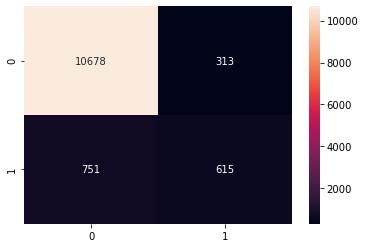

In [50]:
sns.heatmap(cm, annot = True, fmt = 'd')

#### Classification Report

In [52]:
from sklearn.metrics import classification_report

In [54]:
print('ACC', classification_report(y_test, y_pred))

ACC               precision    recall  f1-score   support

           0       0.93      0.97      0.95     10991
           1       0.66      0.45      0.54      1366

    accuracy                           0.91     12357
   macro avg       0.80      0.71      0.74     12357
weighted avg       0.90      0.91      0.91     12357

